In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
fitbit_mean_df = pd.read_csv('fitbit_mean_df.csv')
dave_stats_df = pd.read_csv("Dave_fitbit_stats.csv")

In [3]:
fitbit_mean_df.head()

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tue,13162.0,5.28,25.0,13.0,328.0,728.0,1985.0
1,1503960366,4/13/2016,Wed,10735.0,4.33,21.0,19.0,217.0,776.0,1797.0
2,1503960366,4/14/2016,Thu,10460.0,4.19,30.0,11.0,181.0,1218.0,1776.0
3,1503960366,4/15/2016,Fri,9762.0,3.90,29.0,34.0,209.0,726.0,1745.0
4,1503960366,4/16/2016,Sat,12669.0,5.07,36.0,10.0,221.0,773.0,1863.0


In [4]:
dave_stats_df.head()

,Date:,StepCount,TotalDistance,VeryActiveMinutes,VeryActiveMinutes/2,Calories
0,1/1/23,22278,10.91,0,0.0,4154
1,1/2/23,18981,9.31,0,0.0,3906
2,1/3/23,21779,10.68,0,0.0,4115
3,1/4/23,9408,4.56,0,0.0,3348
4,1/5/23,22051,12.66,64,32.0,5148


In [5]:
dave_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date:                212 non-null    object 
 1   StepCount            212 non-null    int64  
 2   TotalDistance        212 non-null    float64
 3   VeryActiveMinutes    212 non-null    int64  
 4   VeryActiveMinutes/2  212 non-null    float64
 5   Calories             212 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.1+ KB


# Linear Prediction 1: Step Count to Calories 

In [6]:
stepcount_prediction_df = pd.DataFrame({'constant': 1, 'StepCount': dave_stats_df["StepCount"]})

In [7]:
stepcount_prediction_df

,constant,StepCount
0,1,22278
1,1,18981
2,1,21779
3,1,9408
4,1,22051
...,...,...
207,1,9358
208,1,13999
209,1,17335
210,1,16318


In [8]:
# sets x1 to step count

x1 = fitbit_mean_df['TotalSteps']

# sets Y to calories

y = fitbit_mean_df['Calories']


In [9]:
x = sm.add_constant(x1)

In [10]:
results = sm.OLS(y,x).fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     402.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           7.79e-75
Time:                        18:43:58   Log-Likelihood:                -7267.1
No. Observations:                 940   AIC:                         1.454e+04
Df Residuals:                     938   BIC:                         1.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1675.5889     39.427     42.498      0.000    1598.213    1752.965
TotalSteps     0.0826      0.004     20.072      0.000       0.075       0.091
==============================================================================
Omnibus:                       20.377   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.487
Skew:                           0.334   Prob(JB):                     2.16e-05
Kurtosis:                       3.319   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
predictions = results.predict(stepcount_prediction_df)
predictions

0      3516.079417
1      3243.698714
2      3474.854676
3      2452.828085
4      3497.325877
          ...     
207    2448.697350
208    2832.112224
209    3107.714900
210    3023.695739
211    2537.756008
Length: 212, dtype: float64

In [14]:
stepcount_prediction_df["calories_burned_predictions"] = results.predict(linear_prediction_df)
stepcount_prediction_df

,constant,StepCount,calories_burned_predictions
0,1,22278,3516.079417
1,1,18981,3243.698714
2,1,21779,3474.854676
3,1,9408,2452.828085
4,1,22051,3497.325877
...,...,...,...
207,1,9358,2448.697350
208,1,13999,2832.112224
209,1,17335,3107.714900
210,1,16318,3023.695739


In [20]:
stepcount_prediction_df["true_calories_burned"] = dave_stats_df["Calories"]

In [26]:
stepcount_prediction_df

,constant,StepCount,calories_burned_predictions,true_calories_burned,adjusted_calories_burned
0,1,22278,3516.079417,4154,4126.079417
1,1,18981,3243.698714,3906,3853.698714
2,1,21779,3474.854676,4115,4084.854676
3,1,9408,2452.828085,3348,3062.828085
4,1,22051,3497.325877,5148,4107.325877
...,...,...,...,...,...
207,1,9358,2448.697350,3566,3058.697350
208,1,13999,2832.112224,4015,3442.112224
209,1,17335,3107.714900,4243,3717.714900
210,1,16318,3023.695739,4151,3633.695739


In [25]:
stepcount_prediction_df["adjusted_calories_burned"] = stepcount_prediction_df["calories_burned_predictions"] + 610

In [17]:
stepcount_prediction_df.calories_burned_predictions.sum()

622331.9182408785

In [18]:
stepcount_prediction_df.true_calories_burned.sum()

823921

In [28]:
stepcount_prediction_df.adjusted_calories_burned.sum()

751651.9182408785

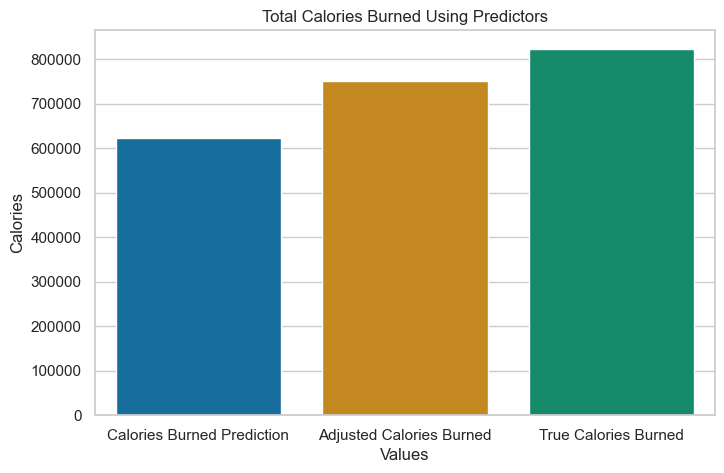

In [73]:
x_values = ["Calories Burned Prediction", "Adjusted Calories Burned", "True Calories Burned"]
data = [622332, 751652, 823921]

# Create a DataFrame
df = pd.DataFrame({"Values": x_values, "Calories": data})

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="Values", y="Calories", data=df, palette="colorblind")

# Add labels and title
plt.xlabel("Values")
plt.ylabel("Calories")
plt.title("Total Calories Burned Using Predictors")

# Show the plot
plt.show()

# Linear Prediction 2: Total Miles to Calories 

In [29]:
totaldistance_prediction_df = pd.DataFrame({'constant': 1, 'TotalDistance': dave_stats_df["TotalDistance"]})

In [30]:
# sets x1 to step count

x1 = fitbit_mean_df['TotalDistance']

# sets Y to calories

y = fitbit_mean_df['Calories']


In [31]:
x = sm.add_constant(x1)

In [32]:
results = sm.OLS(y,x).fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     571.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           5.05e-99
Time:                        19:06:30   Log-Likelihood:                -7211.4
No. Observations:                 940   AIC:                         1.443e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1659.7234     34.563     48.020      0.000    1591.893    1727.554
TotalDistance   189.1328      7.911     23.908      0.000     173.608     204.658
==============================================================================
Omnibus:                       33.868   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.400
Skew:                           0.374   Prob(JB):                     3.76e-10
Kurtosis:                       3.741   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
predictions = results.predict(totaldistance_prediction_df)
predictions

0      3723.162649
1      3420.550108
2      3679.662096
3      2522.169130
4      4054.145114
          ...     
207    2493.799204
208    2955.283328
209    3267.352510
210    3165.220777
211    2773.715804
Length: 212, dtype: float64

In [37]:
totaldistance_prediction_df["calories_burned_predictions"] = results.predict(totaldistance_prediction_df)
totaldistance_prediction_df

,constant,TotalDistance,calories_burned_predictions
0,1,10.91,3723.162649
1,1,9.31,3420.550108
2,1,10.68,3679.662096
3,1,4.56,2522.169130
4,1,12.66,4054.145114
...,...,...,...
207,1,4.41,2493.799204
208,1,6.85,2955.283328
209,1,8.50,3267.352510
210,1,7.96,3165.220777


In [38]:
totaldistance_prediction_df["true_calories_burned"] = dave_stats_df["Calories"]

In [43]:
totaldistance_prediction_df

,constant,TotalDistance,calories_burned_predictions,true_calories_burned,adjusted_calories_burned
0,1,10.91,3723.162649,4154,4348.162649
1,1,9.31,3420.550108,3906,4045.550108
2,1,10.68,3679.662096,4115,4304.662096
3,1,4.56,2522.169130,3348,3147.169130
4,1,12.66,4054.145114,5148,4679.145114
...,...,...,...,...,...
207,1,4.41,2493.799204,3566,3118.799204
208,1,6.85,2955.283328,4015,3580.283328
209,1,8.50,3267.352510,4243,3892.352510
210,1,7.96,3165.220777,4151,3790.220777


In [42]:
totaldistance_prediction_df["adjusted_calories_burned"] = totaldistance_prediction_df["calories_burned_predictions"] + 625

In [40]:
totaldistance_prediction_df.calories_burned_predictions.sum()

656633.2284860901

In [41]:
totaldistance_prediction_df.true_calories_burned.sum()

823921

In [44]:
totaldistance_prediction_df.adjusted_calories_burned.sum()

789133.2284860901

# Linear Prediction 3: Active Minutes to Calories 

In [45]:
activeminutes_prediction_df = pd.DataFrame({'constant': 1, 'VeryActiveMinutes': dave_stats_df["VeryActiveMinutes"]})

In [46]:
# sets x1 to step count

x1 = fitbit_mean_df['VeryActiveMinutes']

# sets Y to calories

y = fitbit_mean_df['Calories']


In [48]:
x = sm.add_constant(x1)

In [49]:
results = sm.OLS(y,x).fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     558.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.53e-97
Time:                        19:24:08   Log-Likelihood:                -7215.6
No. Observations:                 940   AIC:                         1.444e+04
Df Residuals:                     938   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2083.4279     21.156     98.478      0.000    2041.909    2124.947
VeryActiveMinutes    12.5631      0.532     23.622      0.000      11.519      13.607
==============================================================================
Omnibus:                       27.058   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.904
Skew:                           0.335   Prob(JB):                     7.16e-08
Kurtosis:                       3.626   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
predictions = results.predict(activeminutes_prediction_df)
predictions

0      2083.427946
1      2083.427946
2      2083.427946
3      2083.427946
4      2887.469297
          ...     
207    2083.427946
208    2108.554238
209    2083.427946
210    2083.427946
211    2372.380306
Length: 212, dtype: float64

In [52]:
activeminutes_prediction_df["calories_burned_predictions"] = results.predict(activeminutes_prediction_df)
activeminutes_prediction_df

,constant,VeryActiveMinutes,calories_burned_predictions
0,1,0,2083.427946
1,1,0,2083.427946
2,1,0,2083.427946
3,1,0,2083.427946
4,1,64,2887.469297
...,...,...,...
207,1,0,2083.427946
208,1,2,2108.554238
209,1,0,2083.427946
210,1,0,2083.427946


In [53]:
activeminutes_prediction_df["true_calories_burned"] = dave_stats_df["Calories"]

In [54]:
activeminutes_prediction_df["adjusted_calories_burned"] = activeminutes_prediction_df["calories_burned_predictions"] + 202

In [55]:
activeminutes_prediction_df

,constant,VeryActiveMinutes,calories_burned_predictions,true_calories_burned,adjusted_calories_burned
0,1,0,2083.427946,4154,2285.427946
1,1,0,2083.427946,3906,2285.427946
2,1,0,2083.427946,4115,2285.427946
3,1,0,2083.427946,3348,2285.427946
4,1,64,2887.469297,5148,3089.469297
...,...,...,...,...,...
207,1,0,2083.427946,3566,2285.427946
208,1,2,2108.554238,4015,2310.554238
209,1,0,2083.427946,4243,2285.427946
210,1,0,2083.427946,4151,2285.427946


In [58]:
activeminutes_prediction_df.calories_burned_predictions.sum()

518975.1993622187

In [57]:
activeminutes_prediction_df.true_calories_burned.sum()

823921

In [56]:
activeminutes_prediction_df.adjusted_calories_burned.sum()

561799.1993622187

# Multi Linear Regression

In [59]:
multivariate_prediction_df = dave_stats_df

In [64]:
multivariate_prediction_df

,Date:,StepCount,TotalDistance,VeryActiveMinutes,VeryActiveMinutes/2,Calories,calories_burned_predictions
0,1/1/23,22278,10.91,0,0.0,4154,7846.47624
1,1/2/23,18981,9.31,0,0.0,3906,6987.27453
2,1/3/23,21779,10.68,0,0.0,4115,7723.55657
3,1/4/23,9408,4.56,0,0.0,3348,4431.45264
4,1/5/23,22051,12.66,64,32.0,5148,8876.57413
...,...,...,...,...,...,...,...
207,7/27/23,9358,4.41,0,0.0,3566,4344.79564
208,7/28/23,13999,6.85,2,1.0,4015,5664.19807
209,7/29/23,17335,8.50,0,0.0,4243,6551.75905
210,7/30/23,16318,7.96,0,0.0,4151,6259.52194


In [63]:
multivariate_prediction_df["calories_burned_predictions"] = (1983 + (multivariate_prediction_df["StepCount"] * -.02357) + (multivariate_prediction_df["TotalDistance"] * 585.57))

In [65]:
stepcount_prediction_df.to_csv('stepcount_prediction_df.csv', index=False)

In [66]:
totaldistance_prediction_df.to_csv('totaldistance_prediction_df.csv', index=False)

In [67]:
activeminutes_prediction_df.to_csv('activeminutes_prediction_df.csv', index=False)

In [68]:
multivariate_prediction_df.to_csv('multivariate_prediction_df.csv', index=False)